
Dataset: https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recur-
rence
To deliver:
The following list will help you to create a notebook that contains steps taken in data-
science. Nevertheless, as mention in class, your assignment is not limited to these
steps or questions so, please be creative. In your oral presentation you will have to
justify every decision you made, it’ll be also the teacher’s opportunity to ask relevant
questions to you, regarding to your implementation.
1. Load the dataset.
2. Make a descriptive analysis.
3. Take a look at the correlation matrix.

4. Select the variables which you will try to study.
Use a correlation matrix to see how the variables are related be
tween each other and give your opinion (intuition) about why are
these variables correlated or not.


5. Select which of the variables will be the dependent, and which will be the independent variable.
And explain why. For example, if you want to predict the risk of
cancer in patients based on the rest of the variables, your independent variable would
be the risk. Note: All students will potentially have a different perspective of what the
predictive variable will be, since it is up to the student to choose one.


6. For visualization purposes, create a scatterplot for these variables to see
whether their pattern is linear. If not, return to step 3.


7. You would need to perform classification and regression and try to understand
what is the difference between them.
- Perform feature engineering, i.e. construct 3 extra features and create a
predictive model, include cross-validation in your implementation. Choose minimally 3
variables to classify 1 binary variable. Fit a model, use cross validation, and calculate
the appropriate metrics (at least accuracy, precision, ROC plot).
- Choose 4 variables to perform a regression analysis on a variable. Make
sure that the explanatory variables in your data have lower than 0.9 linear correlation.


8. Test whether the model is performing well or not, give results of metrics such as
accuracy, precision and f1-score.


9. Report. Does your model provide a good predictor? Does your model provide
additional insight in the dependent variables which you didn't have before? If the an-
swer to both of these is no, return to step 3.


10. Given the data, what is the likelihood/probability of recurrence in patients diag-
nosed with well-differentiated thyroid cancer?


11. At this point you should be able to answer this question: In general, how can
your predictive model(s) help in these kind of data?


12. Can you perform clusters of information?
How many clusters do you need?
Why these clusters?


13. Does it make sense to perform density based clustering? Why? Why not?. If it
makes sense you must implement it and compare its results with the previous Ma-
chine Learning techniques.
Good luck!


In [90]:
# 1. Load the dataset.
# 2. Make a descriptive analysis.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
df = pd.read_csv("Thyroid_Diff.csv")
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [91]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [92]:
#descriptive analaysis

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [94]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [95]:
df.dtypes


Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

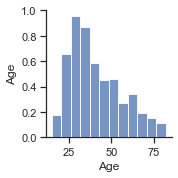

In [96]:
df.dtypes
sns.pairplot(df)

<AxesSubplot:xlabel='Smoking', ylabel='count'>

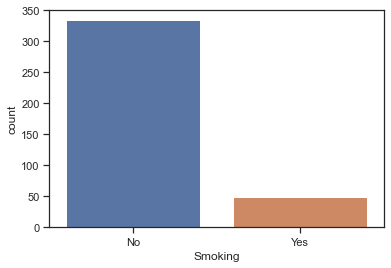

In [97]:
sns.countplot(x='Smoking', data=df)

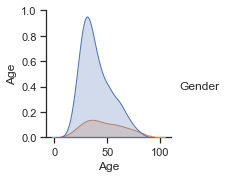

In [98]:
sns.pairplot(df[['Age','Gender','Smoking','Risk']],hue='Gender')

In [99]:
# 3. Take a look at the correlation matrix.

# Select categorical columns
categorical_columns = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
                        'Physical Examination', 'Adenopathy', 'Pathology', 'Focality',
                        'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Now, df_encoded contains one-hot encoded values for categorical columns
# You can use df_encoded for further analysis or modeling


In [100]:
# Check for missing values
df_encoded.isnull().sum()


Age                                                 0
Gender_F                                            0
Gender_M                                            0
Smoking_No                                          0
Smoking_Yes                                         0
Hx Smoking_No                                       0
Hx Smoking_Yes                                      0
Hx Radiothreapy_No                                  0
Hx Radiothreapy_Yes                                 0
Thyroid Function_Clinical Hyperthyroidism           0
Thyroid Function_Clinical Hypothyroidism            0
Thyroid Function_Euthyroid                          0
Thyroid Function_Subclinical Hyperthyroidism        0
Thyroid Function_Subclinical Hypothyroidism         0
Physical Examination_Diffuse goiter                 0
Physical Examination_Multinodular goiter            0
Physical Examination_Normal                         0
Physical Examination_Single nodular goiter-left     0
Physical Examination_Single 

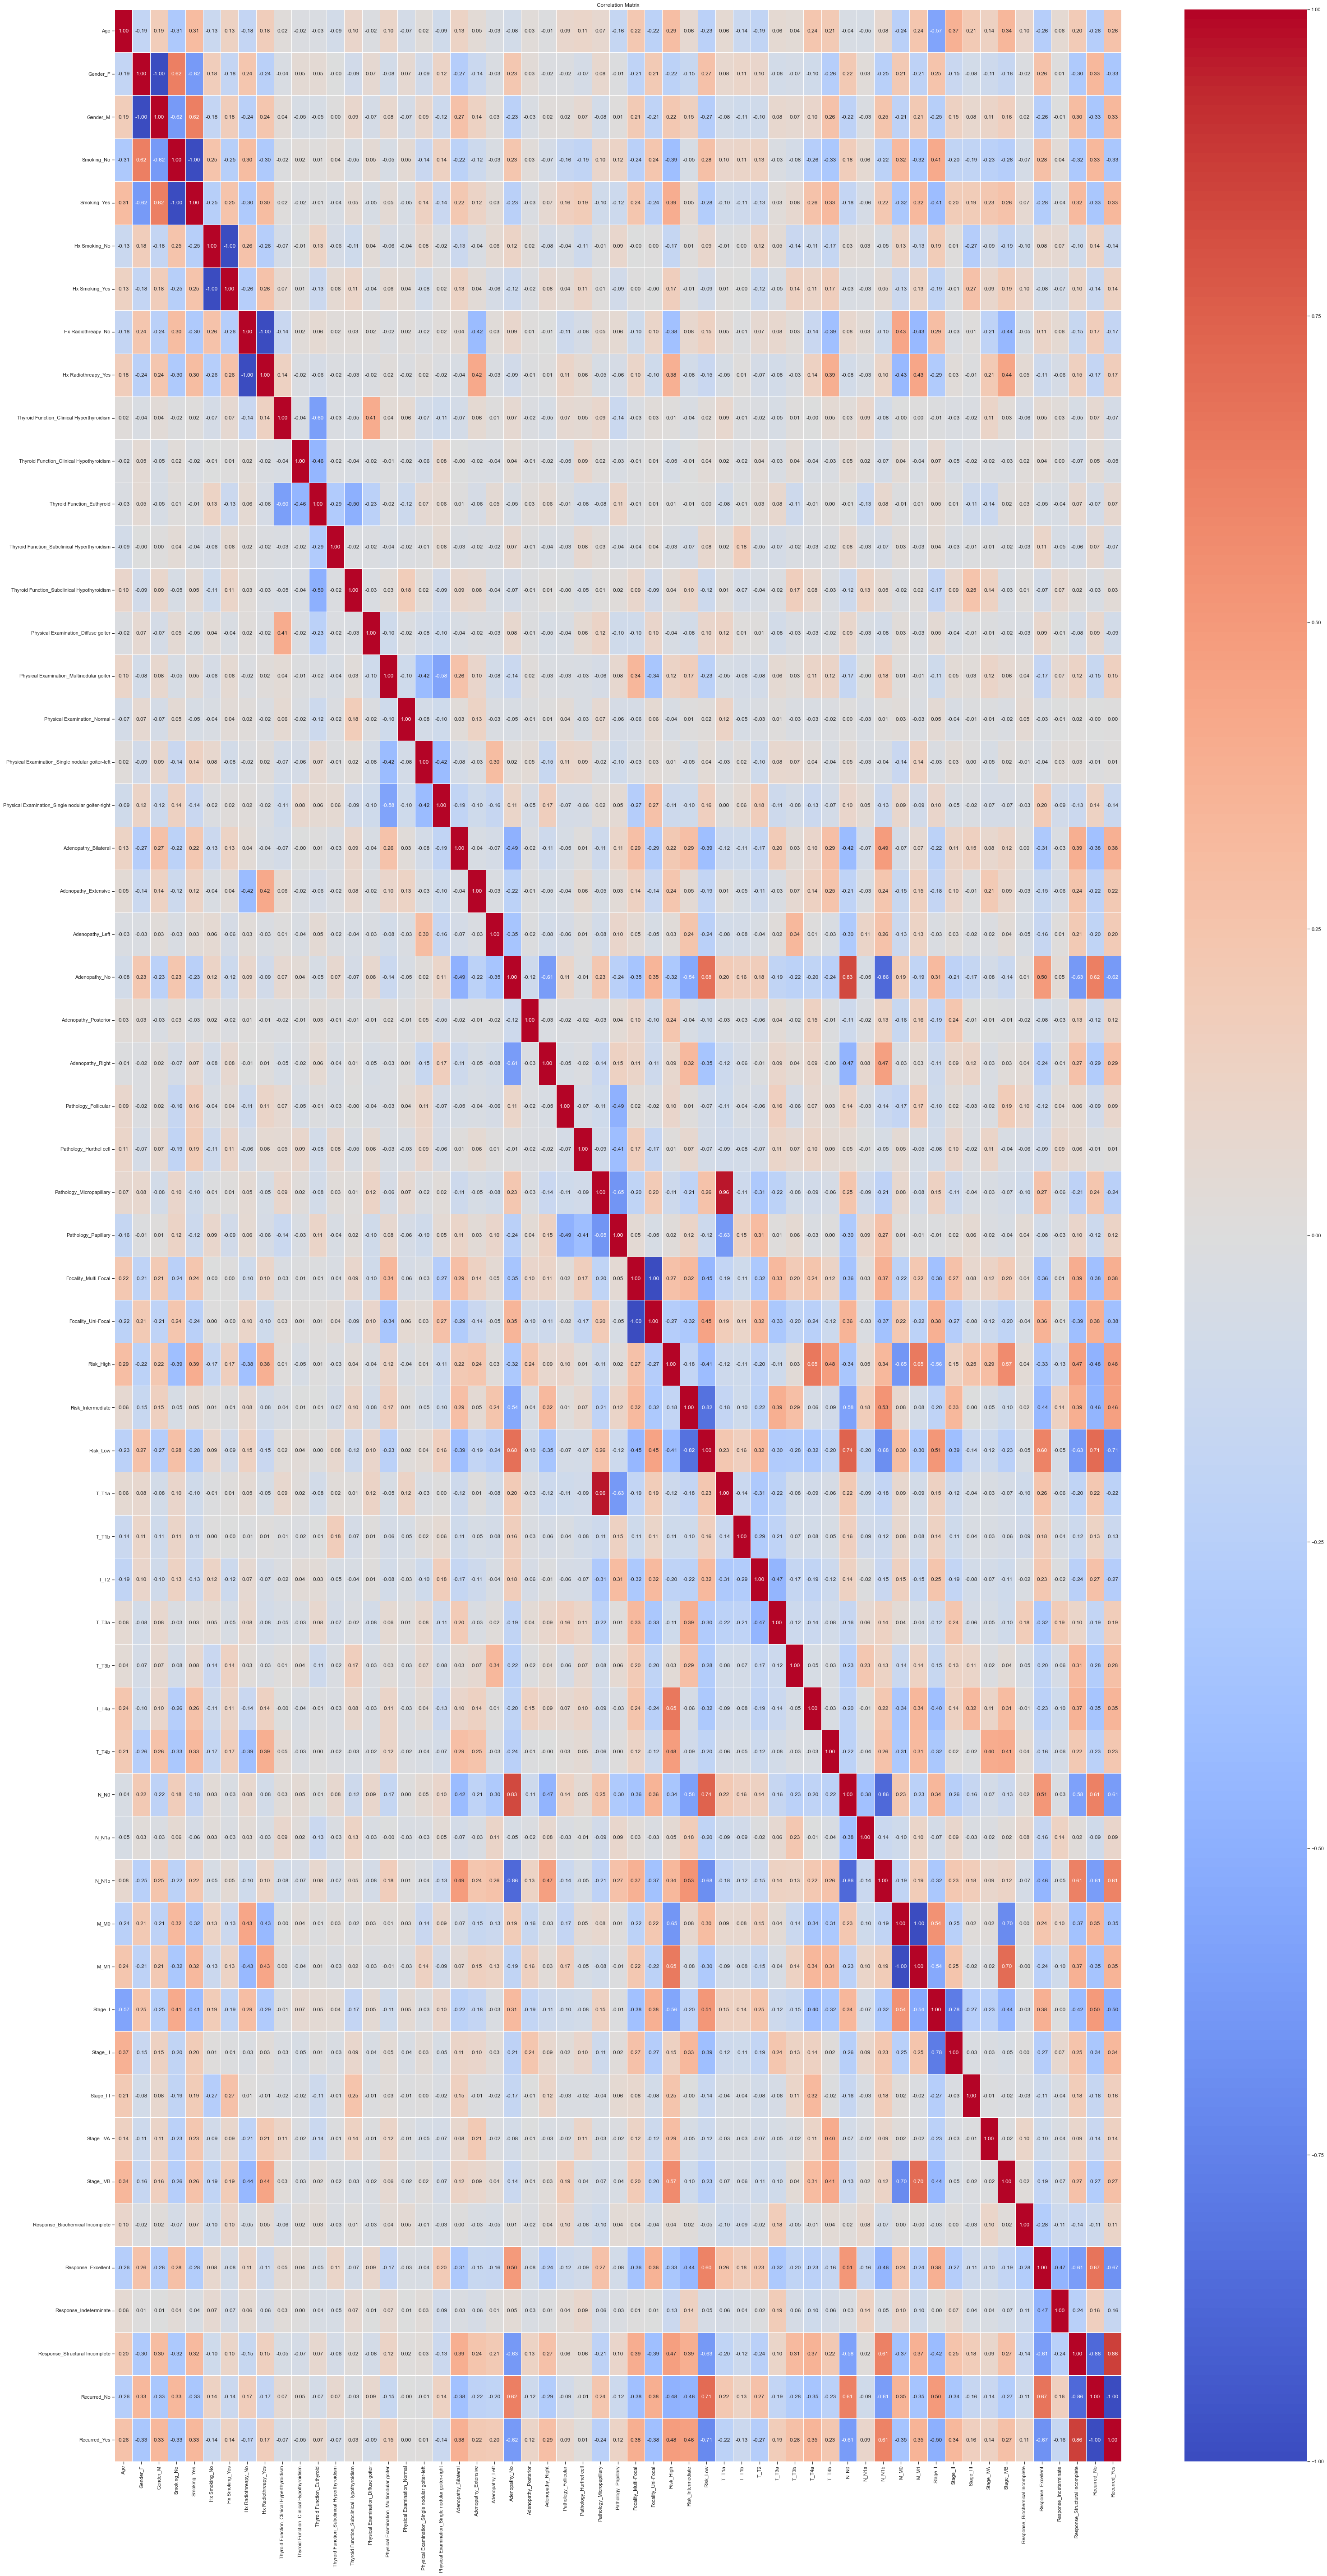

In [101]:
correlation_matrix = df_encoded.corr()

# Plot the heatmap with a smaller figure size
plt.figure(figsize=(50,100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


4. Select the variables which you will try to study.
Use a correlation matrix to see how the variables are related be
tween each other and give your opinion (intuition) about why are
these variables correlated or not.


In [102]:
correlation_matrix

,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_No,Recurred_Yes
Age,1.000000,-0.186457,0.186457,-0.309536,0.309536,-0.134531,0.134531,-0.176588,0.176588,0.020703,...,0.369106,0.208210,0.141867,0.336617,0.100383,-0.258453,0.055762,0.198518,-0.258897,0.258897
Gender_F,-0.186457,1.000000,-1.000000,0.621886,-0.621886,0.175755,-0.175755,0.235865,-0.235865,-0.039033,...,-0.147333,-0.083175,-0.110044,-0.159335,-0.020822,0.263805,0.005657,-0.302000,0.328189,-0.328189
Gender_M,0.186457,-1.000000,1.000000,-0.621886,0.621886,-0.175755,0.175755,-0.235865,0.235865,0.039033,...,0.147333,0.083175,0.110044,0.159335,0.020822,-0.263805,-0.005657,0.302000,-0.328189,0.328189
Smoking_No,-0.309536,0.621886,-0.621886,1.000000,-1.000000,0.252773,-0.252773,0.297874,-0.297874,-0.015504,...,-0.195086,-0.191325,-0.231977,-0.261746,-0.067692,0.276350,0.038540,-0.318792,0.333243,-0.333243
Smoking_Yes,0.309536,-0.621886,0.621886,-1.000000,1.000000,-0.252773,0.252773,-0.297874,0.297874,0.015504,...,0.195086,0.191325,0.231977,0.261746,0.067692,-0.276350,-0.038540,0.318792,-0.333243,0.333243
Hx Smoking_No,-0.134531,0.175755,-0.175755,0.252773,-0.252773,1.000000,-1.000000,0.261198,-0.261198,-0.069335,...,0.012303,-0.267138,-0.088823,-0.191920,-0.097882,0.084694,0.067416,-0.102449,0.136073,-0.136073
Hx Smoking_Yes,0.134531,-0.175755,0.175755,-0.252773,0.252773,-1.000000,1.000000,-0.261198,0.261198,0.069335,...,-0.012303,0.267138,0.088823,0.191920,0.097882,-0.084694,-0.067416,0.102449,-0.136073,0.136073
Hx Radiothreapy_No,-0.176588,0.235865,-0.235865,0.297874,-0.297874,0.261198,-0.261198,1.000000,-1.000000,-0.143207,...,-0.029243,0.014017,-0.208984,-0.443356,-0.047555,0.109624,0.059387,-0.152818,0.174407,-0.174407
Hx Radiothreapy_Yes,0.176588,-0.235865,0.235865,-0.297874,0.297874,-0.261198,0.261198,-1.000000,1.000000,0.143207,...,0.029243,-0.014017,0.208984,0.443356,0.047555,-0.109624,-0.059387,0.152818,-0.174407,0.174407
Thyroid Function_Clinical Hyperthyroidism,0.020703,-0.039033,0.039033,-0.015504,0.015504,-0.069335,0.069335,-0.143207,0.143207,1.000000,...,-0.028460,-0.024114,0.112275,0.029906,-0.059330,0.050381,0.026127,-0.048311,0.068850,-0.068850


In [103]:
# Demographic Information:

# 'Age', 'Gender_F', 'Gender_M': These columns might provide additional information about the individual's age and gender. You could explore whether there are patterns related to smoking status based on age or gender.
# Smoking History:

# 'Hx Smoking_No', 'Hx Smoking_Yes': These columns may represent the historical smoking status of the individual. 'Hx Smoking_Yes' would imply a history of smoking.
# Medical History:

# 'Hx Radiotherapy_No', 'Hx Radiotherapy_Yes': These columns could indicate whether the person has a history of radiotherapy. Smoking status might be relevant in the context of certain medical histories.
# Thyroid Function:

# 'Thyroid Function_...': Different levels of thyroid function may be associated with smoking status. Explore if there are correlations between thyroid function and smoking.
# Physical Examination:

# 'Physical Examination_...': The physical examination findings may have some correlation with smoking. For example, the presence of goiter or nodules could be related to smoking habits.
# Adenopathy and Pathology:

# 'Adenopathy_...', 'Pathology_...': These columns relate to lymph node involvement and pathology results. Smoking might have implications for these aspects in thyroid health.
# Focality, Risk, and Staging:

# 'Focality_...', 'Risk_...', 'T_...', 'N_...', 'M_...', 'Stage_...': These columns provide information about the characteristics and staging of thyroid cancer. Smoking might be associated with certain stages or risks.
# Response and Recurrence:

# Staging (T, N, M, and Stage):

# 'T_T1a', 'T_T1b', 'T_T2', 'T_T3a', 'T_T3b', 'T_T4a', 'T_T4b': These represent the primary tumor size and extent.
# 'N_N0', 'N_N1a', 'N_N1b': These represent lymph node involvement.
# 'M_M0', 'M_M1': These represent the absence or presence of distant metastasis.
# 'Stage_I', 'Stage_II', 'Stage_III', 'Stage_IVA', 'Stage_IVB': Overall staging based on T, N, and M criteria.
# Example: High-risk cases might be associated with higher T stages, lymph node involvement (N1),
# the presence of distant metastasis (M1), and advanced overall stages (Stage III or IV), indicating a more extensive and aggressive disease.

# 'Response_...', 'Recurred_...': These columns may indicate the response to treatment and the recurrence status. Smoking habits might influence treatment outcomes.
# Additional Features:Recurrence:

# 'Recurred_No', 'Recurred_Yes': Indicates whether the cancer has recurred after treatment.
# Example: High-risk cases might be more prone to recurrence ('Recurred_Yes'), indicating a higher likelihood of the cancer coming back even after initial treatment.



In [104]:
# relaiton with respect to 'Smoking_Yes'

correlation_matrix['Smoking_Yes'].sort_values(ascending=True)

Smoking_No                                         -1.000000
Gender_F                                           -0.621886
Stage_I                                            -0.408423
Recurred_No                                        -0.333243
M_M0                                               -0.321233
Hx Radiothreapy_No                                 -0.297874
Response_Excellent                                 -0.276350
Risk_Low                                           -0.276274
Hx Smoking_No                                      -0.252773
Focality_Uni-Focal                                 -0.238494
Adenopathy_No                                      -0.234796
N_N0                                               -0.175432
Physical Examination_Single nodular goiter-right   -0.144643
T_T2                                               -0.133058
Pathology_Papillary                                -0.121169
T_T1b                                              -0.111453
T_T1a                   

In [105]:
# relaiton with respect to 'Risk_High'

In [106]:
correlation_matrix['Risk_High'].sort_values(ascending=True)

M_M0                                               -0.646306
Stage_I                                            -0.555163
Recurred_No                                        -0.481810
Risk_Low                                           -0.411594
Smoking_No                                         -0.392827
Hx Radiothreapy_No                                 -0.381450
N_N0                                               -0.337424
Response_Excellent                                 -0.329180
Adenopathy_No                                      -0.319379
Focality_Uni-Focal                                 -0.268889
Gender_F                                           -0.220176
T_T2                                               -0.204978
Risk_Intermediate                                  -0.181915
Hx Smoking_No                                      -0.168934
Response_Indeterminate                             -0.131419
T_T1a                                              -0.115650
Pathology_Micropapillary

<!-- 
since Gender_M has highest and Risk_High,T_T4b,M_M1,Recurred_Yes 
all have highest corelation respective to  Smoking_Yes .
so These will be considered as features.  -->

5 . Select which of the variables will be the dependent, and which will be the independent variable. 
And explain why. For example, if you want to predict the risk of cancer in patients based on the rest of the variables, 
your independent variable would be the risk. 

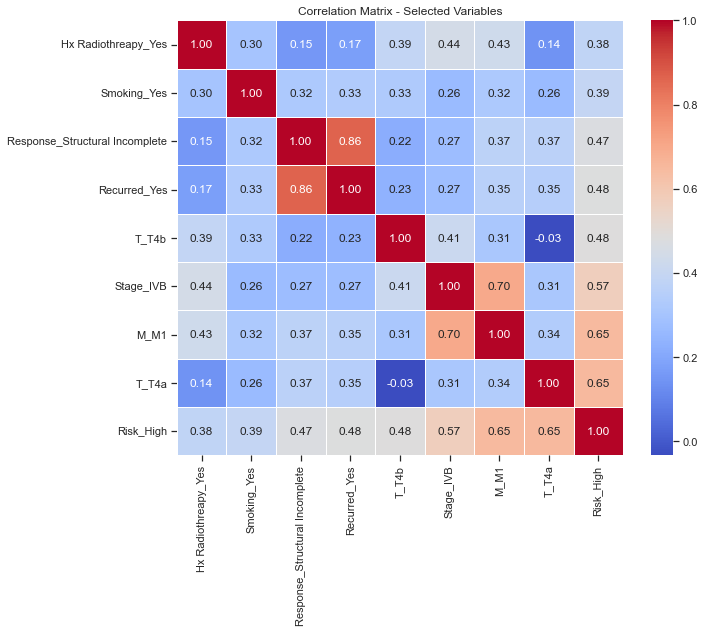

In [121]:
# Select variables of interest

# selected_variables = ['Age', 'Gender_M','Smoking_Yes', 'Response_Structural Incomplete','Recurred_Yes', 'Hx Smoking_Yes', 'Hx Radiothreapy_Yes',
#                        'Stage_IVB','Risk_High']


selected_variables = ['Hx Radiothreapy_Yes','Smoking_Yes', 'Response_Structural Incomplete','Recurred_Yes',
                       'T_T4b','Stage_IVB','M_M1','T_T4a','Risk_High']


# Create a subset DataFrame with selected variables
selected_df = df_encoded[selected_variables]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Selected Variables')
plt.show()


In [122]:
# from correlation we can see: T_T4a,M_M1,Stage_IVB,T_T4b,Recurred_Yes gives highes corelation with respect to Rish_High .

# since M_M1 , T_T4a & T_T4b has high relation with Risk_High.
# 'Stage_I', 'Stage_II', 'Stage_III', 'Stage_IVA', 'Stage_IVB': Overall staging based on T, N, and M criteria.
# And all Stages consists of these fetures we can consider
# 'Stage_IVA' has minimum relation with Risk_High hence we will take 'Stage_IVB' as feture.

############## new ##############
# selected_variables = ['Hx Radiothreapy_Yes','Smoking_Yes', 'Response_Structural Incomplete','Recurred_Yes',
#                        'Stage_IVB','Risk_High']


############## old ##############

# selected_variables = ['Smoking_Yes', 'Response_Structural Incomplete', 'Recurred_Yes', 'Hx Smoking_Yes', 'Hx Radiothreapy_Yes',
#                        'Stage_IVB','Risk_High']


############## old + boy ##############

# selected_variables = ['Age', 'Smoking_Yes', 'Hx Smoking_Yes', 'Hx Radiothreapy_Yes',
#                        'Gender_M','Risk_High']

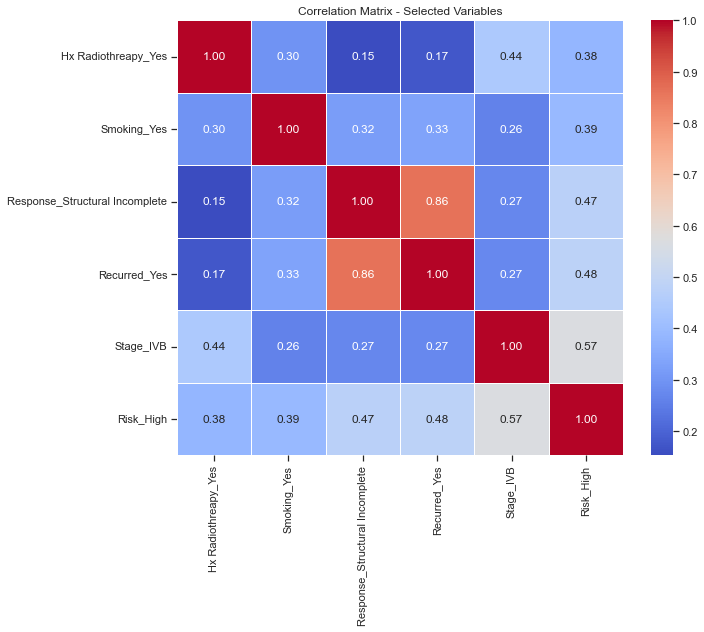

In [124]:
# as we can see we have these best relation with the Risk_High hence these will be our fetures.
# Select variables of interest

selected_variables = ['Hx Radiothreapy_Yes','Smoking_Yes', 'Response_Structural Incomplete','Recurred_Yes',
                       'Stage_IVB','Risk_High']

# Create a subset DataFrame with selected variables
selected_df = df_encoded[selected_variables]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Selected Variables')
plt.show()



5. Select which of the variables will be the dependent, and which will be the inde-
pendent variable. And explain why. For example, if you want to predict the risk of
cancer in patients based on the rest of the variables, your independent variable would
be the risk. Note: All students will potentially have a different perspective of what the
predictive variable will be, since it is up to the student to choose one.

Accuracy: 0.974025974025974
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.67      0.80         6

    accuracy                           0.97        77
   macro avg       0.99      0.83      0.89        77
weighted avg       0.97      0.97      0.97        77



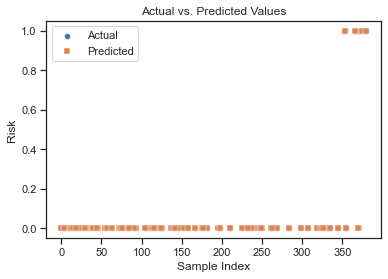

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df_encoded'
# If your DataFrame is not already loaded, you can load it using pd.read_csv or any other method.

# Select variables for modeling
independent_variables = ['Hx Radiothreapy_Yes','Smoking_Yes', 'Response_Structural Incomplete','Recurred_Yes',
                       'Stage_IVB']

dependent_variable = 'Risk_High'

# Create feature matrix (X) and target vector (y)
X = df_encoded[independent_variables]
y = df_encoded[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

# Visualize predicted vs. actual values
sns.scatterplot(x=y_test.index, y=y_test, label='Actual', marker='o')
sns.scatterplot(x=y_test.index, y=y_pred, label='Predicted', marker='s')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Risk')
plt.legend()
plt.show()


5. For visualization purposes, create a scatterplot for these variables to see whether their pattern is linear. 
If not, return to step 3.

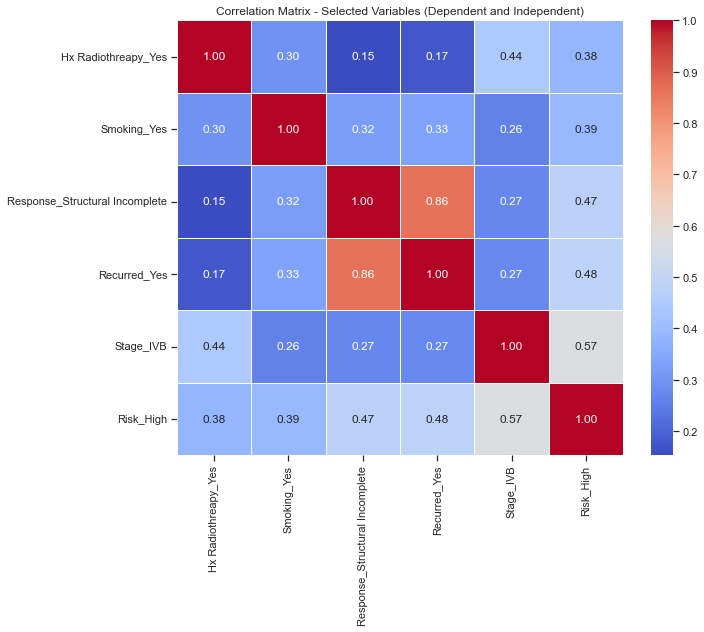

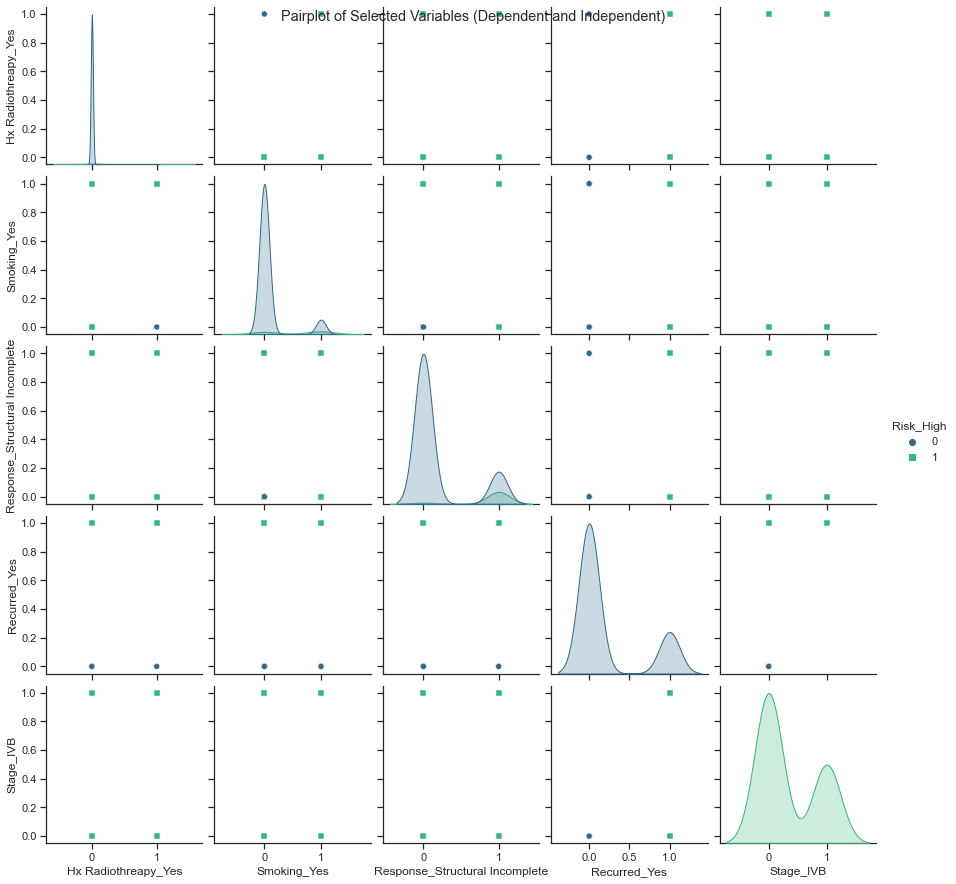

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df_encoded'
# If your DataFrame is not already loaded, you can load it using pd.read_csv or any other method.

# Select variables for correlation matrix and pairplot
selected_variables = ['Hx Radiothreapy_Yes','Smoking_Yes', 'Response_Structural Incomplete','Recurred_Yes',
                       'Stage_IVB','Risk_High']
# Create a subset DataFrame with selected variables
selected_df = df_encoded[selected_variables]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Selected Variables (Dependent and Independent)')
plt.show()

# Pairplot for scatterplots
sns.pairplot(selected_df, hue='Risk_High', palette='viridis', markers=["o", "s"])
plt.suptitle('Pairplot of Selected Variables (Dependent and Independent)')
plt.show()


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined
# Create and train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Classification Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Classification Accuracy: 0.974025974025974
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.67      0.80         6

    accuracy                           0.97        77
   macro avg       0.99      0.83      0.89        77
weighted avg       0.97      0.97      0.97        77



In [131]:
# FOR LINEAR MODEL

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined
# Create and train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 0.023367639011627132
R-squared Score: 0.6747729302818373


In [133]:
# FOR RANDOM FOREST CLASSIFIER

Cross-Validated Accuracy: 0.940
Cross-Validated Precision: 0.886


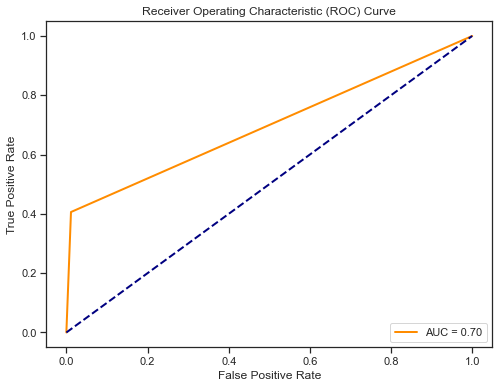

In [142]:
# Feature Engineering
df_encoded['Feature1'] = df_encoded['Hx Radiothreapy_Yes'] * df_encoded['Smoking_Yes']
df_encoded['Feature2'] = df_encoded['Response_Structural Incomplete'].astype(int) + df_encoded['Recurred_Yes'].astype(int)
df_encoded['Feature3'] = df_encoded['Stage_IVB'] * df_encoded['Risk_High']

# Select features and target variable
features = ['Hx Radiothreapy_Yes', 'Smoking_Yes', 'Response_Structural Incomplete', 'Recurred_Yes', 'Stage_IVB', 'Feature1', 'Feature2', 'Feature3']
target = 'Risk_High'

X = df_encoded[features]
y = df_encoded[target]

# Create a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)

# Cross-validated predictions
predicted_labels = cross_val_predict(classifier, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Calculate cross-validated accuracy and precision
accuracy = cross_val_score(classifier, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
precision = cross_val_score(classifier, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='precision')

print(f'Cross-Validated Accuracy: {accuracy.mean():.3f}')
print(f'Cross-Validated Precision: {precision.mean():.3f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y, predicted_labels)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


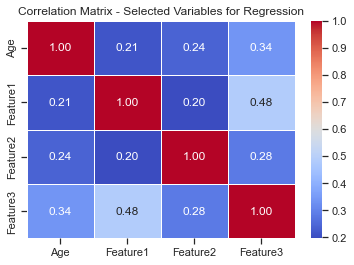

Mean Squared Error: 0.02471560704734396
R-squared Score: 0.6560121263293371


In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df_encoded'
# If your DataFrame is not already loaded, you can load it using pd.read_csv or any other method.

# Select variables with lower than 0.9 linear correlation
selected_variables = ['Age', 'Feature1', 'Feature2', 'Feature3']

# Create a subset DataFrame with selected variables
selected_df = df_encoded[selected_variables]

# Check linear correlation matrix
correlation_matrix = selected_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Selected Variables for Regression')
plt.show()

# Select a target variable for regression
target_variable = 'Risk_High'

# Create feature matrix (X) and target vector (y)
X = selected_df
y = df_encoded[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


In [145]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already trained the regression model and made predictions (y_pred)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 0.02471560704734396
R-squared Score: 0.6560121263293371


In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming your DataFrame is named 'df_encoded'
# If your DataFrame is not already loaded, you can load it using pd.read_csv or any other method.

# Select relevant features and target variable
features = ['Hx Radiothreapy_Yes', 'Smoking_Yes', 'Response_Structural Incomplete', 'Stage_IVB']
target = 'Recurred_Yes'  # Binary variable indicating recurrence

# Create feature matrix (X) and target vector (y)
X = df_encoded[features]
y = df_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]  # Probability of positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')
print(f'ROC AUC: {roc_auc:.3f}')


Accuracy: 0.961
Precision: 1.000
Recall: 0.842
F1 Score: 0.914
ROC AUC: 0.946


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

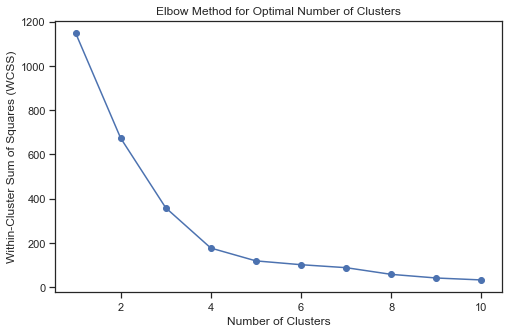

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

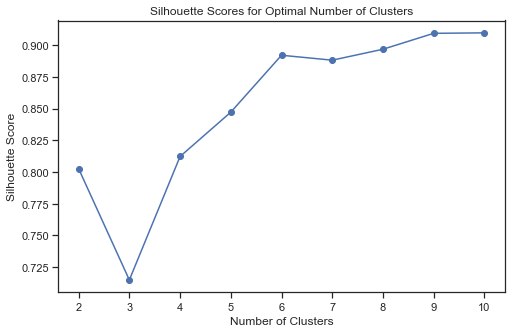

In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'YourDataFrame'
# If your DataFrame is not already loaded, you can load it using pd.read_csv or any other method.

# Assuming 'YourFeatures' are the features you want to use for clustering
features_for_clustering = ['Feature1', 'Feature2', 'Feature3']

# Extract relevant features
data_for_clustering = df_encoded[features_for_clustering]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Elbow Method to find the optimal number of clusters
# Elbow Method to find the optimal number of clusters
# Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Silhouette Score to find the optimal number of clusters
silhouette_scores = []

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)



# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Silhouette Score to find the optimal number of clusters
silhouette_scores = []

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [42]:
df_encoded.dtypes

Age                                                 int64
Gender_F                                            uint8
Gender_M                                            uint8
Smoking_No                                          uint8
Smoking_Yes                                         uint8
Hx Smoking_No                                       uint8
Hx Smoking_Yes                                      uint8
Hx Radiothreapy_No                                  uint8
Hx Radiothreapy_Yes                                 uint8
Thyroid Function_Clinical Hyperthyroidism           uint8
Thyroid Function_Clinical Hypothyroidism            uint8
Thyroid Function_Euthyroid                          uint8
Thyroid Function_Subclinical Hyperthyroidism        uint8
Thyroid Function_Subclinical Hypothyroidism         uint8
Physical Examination_Diffuse goiter                 uint8
Physical Examination_Multinodular goiter            uint8
Physical Examination_Normal                         uint8
Physical Exami

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

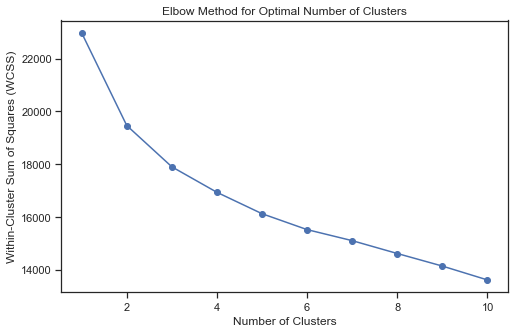

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

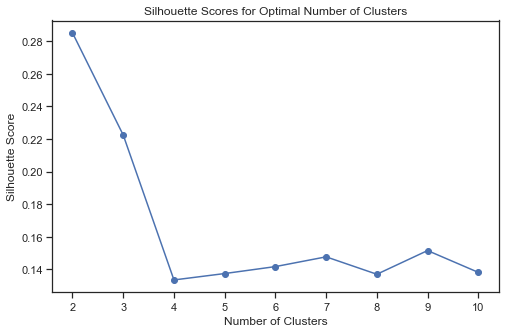

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'YourDataFrame'
# If your DataFrame is not already loaded, you can load it using pd.read_csv or any other method.

# Select all numerical features for clustering
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64','uint8','int32','object']).columns

# Extract relevant features
data_for_clustering = df_encoded[numerical_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Silhouette Score to find the optimal number of clusters
silhouette_scores = []

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [44]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Assuming your DataFrame is named 'YourDataFrame'
# If your DataFrame is not already loaded, you can load it using pd.read_csv or any other method.

# Select all numerical features, including 'uint8', for clustering
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64', 'uint8']).columns

# Extract relevant features
data_for_clustering = df_encoded[numerical_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.7, min_samples=3)  # You may need to adjust the parameters
cluster_labels_dbscan = dbscan.fit_predict(scaled_data)

# Silhouette Score for DBSCAN
silhouette_score_dbscan = silhouette_score(scaled_data, cluster_labels_dbscan)

print(f'Silhouette Score for DBSCAN: {silhouette_score_dbscan}')


Silhouette Score for DBSCAN: -0.024801953243227298


In [45]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Try different values for eps and min_samples
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

best_silhouette_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(scaled_data)
        silhouette = silhouette_score(scaled_data, cluster_labels)

        print(f'eps={eps}, min_samples={min_samples}, Silhouette Score: {silhouette}')

        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_eps = eps
            best_min_samples = min_samples

print(f'Best parameters: eps={best_eps}, min_samples={best_min_samples}, Best Silhouette Score: {best_silhouette_score}')


eps=0.3, min_samples=3, Silhouette Score: -0.12604469869438537
eps=0.3, min_samples=5, Silhouette Score: -0.17886483360016853
eps=0.3, min_samples=7, Silhouette Score: -0.19091486197564722
eps=0.5, min_samples=3, Silhouette Score: -0.0633580969765595
eps=0.5, min_samples=5, Silhouette Score: -0.12132274790843425
eps=0.5, min_samples=7, Silhouette Score: -0.1468430723486386
eps=0.7, min_samples=3, Silhouette Score: -0.024801953243227298
eps=0.7, min_samples=5, Silhouette Score: -0.10134321686701388
eps=0.7, min_samples=7, Silhouette Score: -0.1104390111166704
Best parameters: eps=0.7, min_samples=3, Best Silhouette Score: -0.024801953243227298


In [46]:
pip install --upgrade scikit-learn


   ---------------------------------------- 10.6/10.6 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [47]:
 pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'Age' is the only numerical feature in your DataFrame
scaler = MinMaxScaler()
df_encoded['Age'] = scaler.fit_transform(df_encoded[['Age']])


In [49]:
from sklearn.model_selection import train_test_split

# Assuming 'target_column' is the column you want to predict
X = df_encoded.drop('Age', axis=1)
y = df_encoded['Recurred_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [51]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        19

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



In [52]:
#visualisation #making a heatmap

In [53]:

indepent_var=['Age','Gender','Thyroid Function','Risk','Smoking','Hx Smoking']
dependent_var = 'Recurred'
y = df[indepent_var]
x = df[dependent_var]

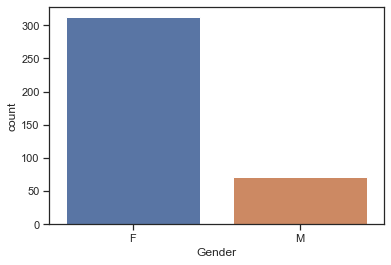

     Age
Age  1.0


In [54]:


sns.countplot(x='Gender', data=df)
plt.show()


correlation_matrix = df.corr()
print(correlation_matrix)

In [55]:

correlation_matrix = x.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=.5, center=0,
            square=True, annot=True)

plt.title('Correlation Matrix')
plt.show()


TypeError: corr() missing 1 required positional argument: 'other'

In [ ]:
matrix = df.corr()
matrix

In [ ]:
#dependance of variables
#train test

In [ ]:
indepent_var=['Age','Gender','Thyroid Function','Risk']
dependent_var = 'Recurred'

In [ ]:
x = df[indepent_var]
y = df[dependent_var]

x=pd.get_dummies(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()

x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)


l_model = LogisticRegression(max_iter=1000)

l_model.fit(x_train,y_train)

l_model.feature_names_in_ = list(x.columns)

pred = l_model.predict(x_test)

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred,pos_label='Yes')
f1 = f1_score(y_test, pred,pos_label='Yes')
conf_matrix = confusion_matrix(y_test, pred)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')



In [ ]:
saves =['Age', 'Gender', 'Smoking', 'Risk', 'T', 'N', 'M', 'Recurred']
sd = df[saves]
sns.pairplot(sd,hue='Recurred')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Choose the relevant variables for the scatterplot
sns.scatterplot(x=df['Age'], y=df['Risk'])
plt.title('Age vs. Risk')
plt.show()


In [ ]:
x_vis = df[['Age','Risk','Recurred']]
x_vis = pd.get_dummies(x_vis)
sns.scatterplot(x='Age',y='Risk_High',hue='Recurred_Yes',data=x_vis)
plt.title("age vs risk ")
plt.xlabel("Age")
plt.ylabel('Risk')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
rf = RandomForestClassifier()
cv=cross_val_score(rf,x,y,cv=5)
rf.fit(x_train,y_train)
y_probs = rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test.map({'No': 0, 'Yes': 1}), y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'Age' is the dependent variable
independent_vars_reg = ['Gender', 'Thyroid Function', 'Risk', 'Recurred']
dependent_var_reg = 'Age'

# Selecting features and target for regression
X_reg = df[independent_vars_reg]
y_reg = df[dependent_var_reg]

# Convert categorical variables to dummy variables
X_reg = pd.get_dummies(X_reg, drop_first=True)

# Initialize the model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X_reg, y_reg)

# Model Evaluation
y_pred_reg = linear_reg.predict(X_reg)
mse_reg = mean_squared_error(y_reg, y_pred_reg)

# Print metrics
print(f'Mean Squared Error (Linear Regression): {mse_reg}')


In [ ]:
# Assuming 'Age' is the dependent variable
X_prob = df[independent_vars_reg]
X_prob = pd.get_dummies(X_prob, drop_first=True)

# Predict probability of recurrence
y_prob_reg = linear_reg.predict(X_prob)

# Print probabilities
print(f'Probabilities of Recurrence (Linear Regression):\n{y_prob_reg}')


In [ ]:
from sklearn.cluster import KMeans


# Assuming 'Age' is the dependent variable for clustering
X_cluster = df[['Age']].copy()

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Set n_init explicitly
X_cluster.loc[:, 'Cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clusters
plt.scatter(X_cluster['Age'], X_cluster['Cluster'], c=X_cluster['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Cluster')
plt.title('K-Means Clustering of Age')
plt.show()



In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
X_cluster['DBSCAN_Label'] = dbscan.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(X_cluster['Age'], X_cluster['DBSCAN_Label'], c=X_cluster['DBSCAN_Label'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('DBSCAN Cluster')
plt.title('DBSCAN Clustering of Age')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
X_cluster = df.copy()
X_cluster['Cluster'] = kmeans.fit_predict(x)

# Visualize clusters
plt.scatter(X_cluster['Age'], X_cluster['Cluster'], c=X_cluster['Cluster'], cmap='viridis')
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
X_cluster['DBSCAN_Label'] = dbscan.fit_predict(x)

# Visualize clusters
plt.scatter(X_cluster['Age'], X_cluster['DBSCAN_Label'], c=X_cluster['DBSCAN_Label'], cmap='viridis')
plt.show()

In [ ]:
feature = df.select_dtypes(include=[np.number]).columns
for e in feature:
    if e !='Risk':
        sns.boxenplot(x='Risk',y=e,data=df)
        
        
        
plt.show()

In [ ]:
model = LogisticRegression(C=0.1)

In [ ]:
model.fit(x_train, y_train)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test,model.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_,)
disp.plot()

In [ ]:
# Display the columns in your DataFrame
print(df.columns)


In [ ]:


# Choose features and target variable
X = df[['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy']]
y = df['Recurred']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy'])

# Feature engineering
# Example feature engineering - Modify this based on your data
X['New_Feature_1'] = X['Age'] * X['Gender_M']  # Adjust 'Gender_M' based on the one-hot encoding

# Drop the original categorical columns
X = X.drop(columns=['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(classifier, x_train, y_train, cv=5)

# Train the model
classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print("Cross-Validation Accuracy: ", cv_scores.mean())
print("Test Set Accuracy: ", accuracy)
print("Precision: ", precision)
print("ROC AUC: ", roc_auc)